# Homework 3 - Graph Visualization


## Data 620 - Team VAC (Vyanna, Alex and Cliff)

### Abstract

For my assigment, we chose the Karate network dataset shared in the [UMICH Dataset collection](http://www-personal.umich.edu/~mejn/netdata/). The network is an undirected graph of friendships between students in a particular [karkate club](http://www-personal.umich.edu/~mejn/netdata/karate.zip).

Since the data comes in the GML format, I used the Networkx.read_gml function to easily load the graph.  To help with this particular assignment, we added additional attributes to the karate dataset:  belt color; gender.

From the visualization, we quickly notice the graph is not fully connected suggesting this dataset serves as an example of division and fissions in a small group. 

In [128]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

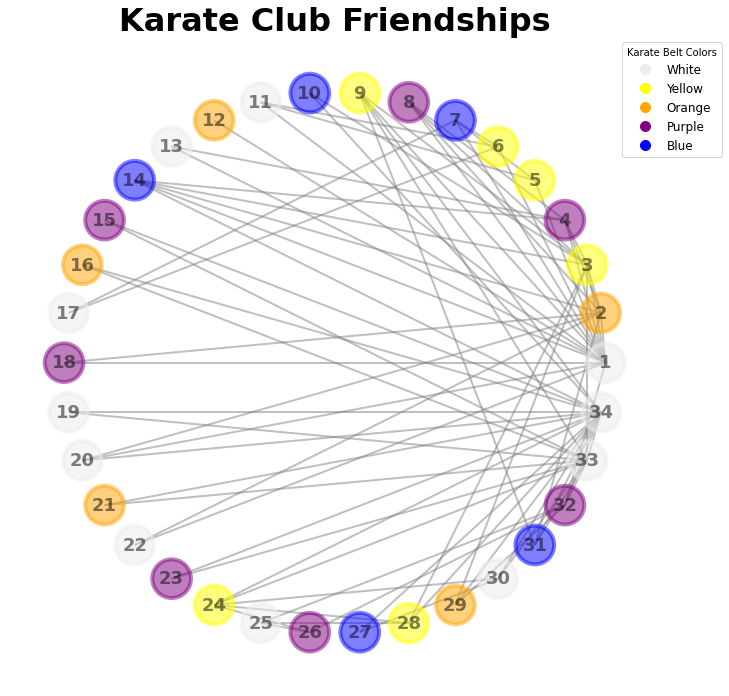

Graph with 34 nodes and 78 edges
The graph's diameter is: 5


In [129]:
#VH
data =nx.read_gml("karate.gml", label='id')

# Format the figure size and aspect ratio
plt.figure(figsize=(12, 12))
ax = plt.gca()
ax.set_aspect('equal')
pos = nx.circular_layout(data, scale=1)

# Use the belt colors for the node colors
colors_dict = nx.get_node_attributes(data, 'belt') 
colors = list(colors_dict.values())

# Retrieving genders of each member
genders = list(nx.get_node_attributes(data, 'gender').values())

# Check if the network is fully connected
nx.is_connected(data)

# Let's create the network graph plot!
nx.draw(data, 
        pos=pos,
        font_size=18,
        font_weight="bold",
        font_color="black",
        with_labels=True, 
        node_size=1500, 
        node_color=colors,
        edge_color="grey",
        node_shape="o", 
        alpha=0.5, 
        linewidths=4, 
        width=2)


# Graph formatting

# Title
plt.title("Karate Club Friendships", fontdict= { 'fontsize': 32, 'fontweight':'bold'}, loc='center')

# Legend
# Patch code from Stack Overflow: https://stackoverflow.com/a/44113141
colors = ["#EDEDED", "yellow", "orange", "purple", "blue"]
texts = ["White", "Yellow", "Orange", "Purple", "Blue"]
patches = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(title="Karate Belt Colors",
           handles=patches, 
           ncol=1, 
           numpoints=1, 
           fontsize = 12, 
           loc="upper right",
           bbox_to_anchor=(1.1, 1)
          )


plt.show()


In [151]:
# Find the 'celebrities' in this network
# Stack Overflow - https://stackoverflow.com/a/48382895
sorted_degree = sorted(deg, key=lambda x: x[1], reverse=True)

print (sorted_degree[0:4])

[(34, 17), (1, 16), (33, 12), (3, 10)]


The celebrities are nodes 34, 1, 33 and 3 with all having degrees above 10.

In [132]:
print('Graph with {0} nodes and {1} edges'.format(nx.number_of_nodes(data), nx.number_of_edges(data)))


# use networkx to find the network's diameter
print('The graph\'s diameter is: {0}'.format(nx.diameter(data)))

Graph with 34 nodes and 78 edges
The graph's diameter is: 5


The graph has a diameter of 5 nodes.

For other secondary metrics, we can calculate the the closness centrality and the degree of assortativity on the dataset!

In [159]:
nx.closeness_centrality(data)


{1: 0.5689655172413793,
 2: 0.4852941176470588,
 3: 0.559322033898305,
 4: 0.4647887323943662,
 5: 0.3793103448275862,
 6: 0.38372093023255816,
 7: 0.38372093023255816,
 8: 0.44,
 9: 0.515625,
 10: 0.4342105263157895,
 11: 0.3793103448275862,
 12: 0.36666666666666664,
 13: 0.3707865168539326,
 14: 0.515625,
 15: 0.3707865168539326,
 16: 0.3707865168539326,
 17: 0.28448275862068967,
 18: 0.375,
 19: 0.3707865168539326,
 20: 0.5,
 21: 0.3707865168539326,
 22: 0.375,
 23: 0.3707865168539326,
 24: 0.39285714285714285,
 25: 0.375,
 26: 0.375,
 27: 0.3626373626373626,
 28: 0.4583333333333333,
 29: 0.4520547945205479,
 30: 0.38372093023255816,
 31: 0.4583333333333333,
 32: 0.5409836065573771,
 33: 0.515625,
 34: 0.55}

From our results, node 1 has the best distance between all the nodes as its holdest the highest score. Node 1 has the ability to create the shortest path.

In [131]:
nx.degree_assortativity_coefficient(data)

-0.47561309768461413

For the assortativity coefficient, it ranked at -0.476. The scale of the assortativity coefficient degree is on -1 to 1; there was not a strong preference between the students in the friendships that formed with similar people.


In [86]:
nx.eigenvector_centrality(data)

{1: 0.3554834941851943,
 2: 0.2659538704545025,
 3: 0.3171893899684447,
 4: 0.21117407832057059,
 5: 0.0759664588165738,
 6: 0.07948057788594245,
 7: 0.07948057788594245,
 8: 0.17095511498035434,
 9: 0.2274050914716605,
 10: 0.10267519030637756,
 11: 0.0759664588165738,
 12: 0.052854169452336466,
 13: 0.08425192086558085,
 14: 0.22646969838808145,
 15: 0.10140627846270832,
 16: 0.10140627846270832,
 17: 0.02363479426059687,
 18: 0.09239675666845952,
 19: 0.10140627846270832,
 20: 0.14791134007618664,
 21: 0.10140627846270832,
 22: 0.09239675666845952,
 23: 0.10140627846270832,
 24: 0.15012328691726784,
 25: 0.05705373563802805,
 26: 0.059208202502790096,
 27: 0.07558192219009324,
 28: 0.13347932684333305,
 29: 0.13107925627221215,
 30: 0.13496528673866567,
 31: 0.17476027834493085,
 32: 0.191036269797917,
 33: 0.30865104773369595,
 34: 0.373371213013235}